### The spark Foundation - Graduate Rotational Internship Program
#### Track : Data Science & Business Analytics
#### Name : Ali Mostafa Ali
#### Task1 : Prediction Using Supervised ML
#### Dataset URL : http://bit.ly/w-data

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#to ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")

### STEP 1 - Import Data & Print First 5 Rows 

In [153]:
url ="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data imported successfully")
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [136]:
#to find more information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [137]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [138]:
#check null in our dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### STEP 2 - Data Visualization

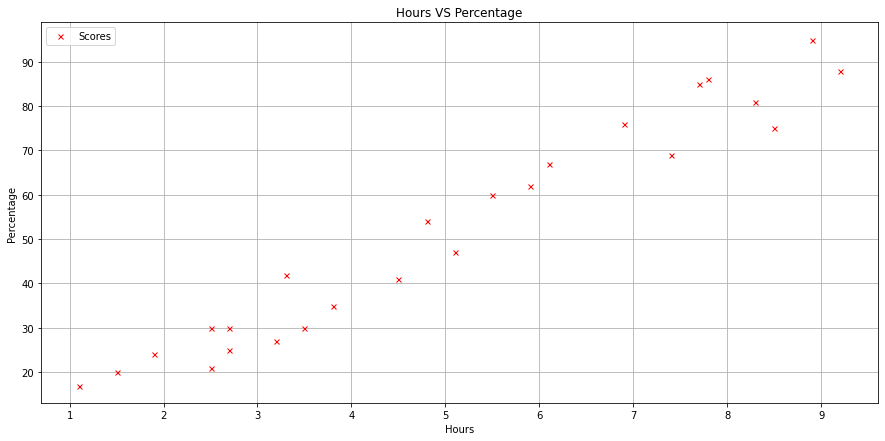

In [139]:
#plotting The Dataset
plt.rcParams['figure.figsize']=[15,7]
df.plot(x='Hours',y='Scores',style='x',color='red',markersize=5)
plt.title('Hours VS Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.grid()
plt.show()

From the gragh above ,we can observe that there are a Linear Regression between "Hours" and "percentage"
so we can use the Linear Regression machine model to predict further values.

### STEP 3 - Data Preparation
##### in this step we will divide the data into "attributes"(inputs) and "labels"(output) , after that spilit all dataset into 2 parts tesing data and training data


In [140]:
x=df.iloc[:,:1].values #all rows and first column
y=df.iloc[:,1:].values #all rows and second column

In [141]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [142]:
#Split data intoo 80% Training and 20% Testing
from sklearn.model_selection import train_test_split
X_train ,X_test,Y_train ,Y_test =train_test_split(x,y,train_size=0.8,random_state=0)

### STEP 4 -  Training The Model

In [143]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
print("Training Complete")

Training Complete


### STEP 5 - Visualization Data Model

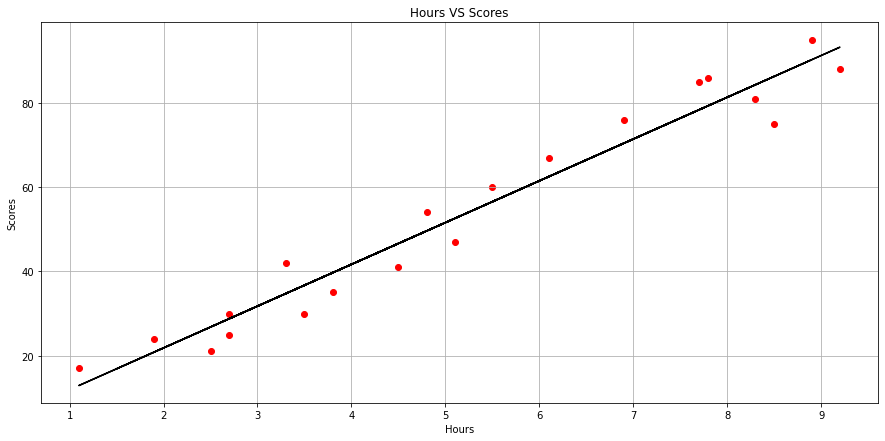

In [144]:
line =model.coef_*x+model.intercept_
#plotting training data
plt.rcParams['figure.figsize']=[15,7]
plt.scatter(X_train,Y_train,color='red')
plt.plot(x,line,color='black')
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()


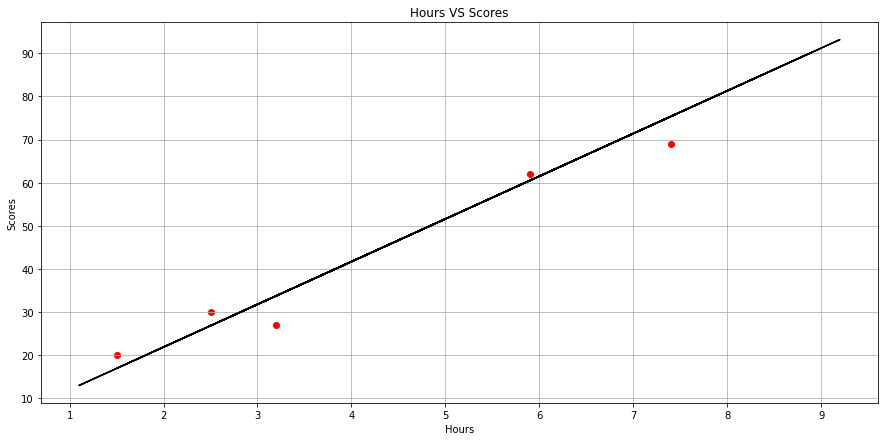

In [145]:
#plotting testing data
plt.rcParams['figure.figsize']=[15,7]
plt.scatter(X_test,Y_test,color='red')
#plt.plot(x,line,style='x',color='red',markersize=5)
plt.plot(x,line,color='black')
plt.title('Hours VS Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid()
plt.show()

### STEP 6 - Making Prediction 

In [146]:
y_prediction=model.predict(X_test)
y_prediction


array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [150]:
#comparing between Actual and predicted
df2=pd.DataFrame({'Actual':[Y_test], 'Prediction':[y_prediction]})
df2

,Actual,Prediction
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


#### Prediction Score if a Student Study 9.25 hrs/day

In [151]:
predict_score=r.predict([[9.25]])
print("Prediction Score if a Student Study 9.25 hrs/day :" ,float(predict_score))

Prediction Score if a Student Study 9.25 hrs/day : 93.69173248737538


### STEP 7 - Evaluation The Model

In [152]:
from sklearn import metrics
print("Mean Absolute Error :",metrics.mean_absolute_error(Y_test,y_prediction))

Mean Absolute Error : 4.183859899002975
